# Texts 1 to 3 Feature Evaluation and Linear Regression

This notebook calls the TextScorer Class (which in turn calls the TextItems class to extract vocabulary items from the specified text files, and the various Feature classes to assign feature scores) to produce a pandas dataframe of the vocabulary items in each sample text, their POS tags and their various feature scores. The TeacherScores class adds the aggregated teacher score for each vocabulary item to this frame.

The Analysis_Helper class is then called to evaluate each feature's scores against the target teacher scores and return the mean squared error rate and the Pearson correlation co-efficient.

We use scikitlearn's Linear Regression feature to select useful features and learn co-efficients for a final overall difficulty score calculation, then call once more on the Analysis_Helper to evaluate these overall scores.

#### Create instances of the TextScorer class to extract vocab items, their feature scores and their teacher scores

In [1]:
from tool.TextScorer import TextScorer
from tool.TeacherScores import TeacherScores
from tool.Analysis_Helper import Analysis_Helper

In [2]:
text1 = TextScorer('files/sample_texts/text1.txt')
text1.add_all_scores()
text1_with_teacherscores=TeacherScores('text1').add_teacher_scores(text1.master_table)

In [3]:
text2 = TextScorer('files/sample_texts/text2.txt')
text2.add_all_scores()
text2_with_teacherscores=TeacherScores('text2').add_teacher_scores(text2.master_table)

In [4]:
text3 = TextScorer('files/sample_texts/text3.txt')
text3.add_all_scores()
text3_with_teacherscores=TeacherScores('text3').add_teacher_scores(text3.master_table)

In [5]:
#example of text 1's dataframe:
text1_with_teacherscores

,word_in_text,pos_tag,mapped_tag,freq_score,l1sim_score,length_score,POS_Score,freq_pos_normalised_score,teacher_score
0,to,TO,PREPS_DETS_CONJ,0.054154,0.666667,0.00185529,0.0324587,0.054164,0
1,subject,JJ,ADJ_ADV,0.356791,0.166667,0.0760668,0.420299,0.405467,0
2,our,PRP$,PRONOUN,0.267140,0.5,0.00371058,0,0.267387,0
3,funding,VBG,VERB,0.464194,0.666667,0.0760668,0.512119,0.584441,0.333333
4,deal,NN,NOUN,0.376342,0.555556,0.00556586,0.552684,0.405247,0
5,howdy,NNP,PRP_NOUN,0.875378,1,0.0166976,0.128466,0.929630,0.5
6,i,PRP,PRONOUN,0.124215,1,0,0,0.124513,0
7,was,VBD,VERB,0.123285,0.666667,0.00371058,0.512119,0.123529,0
8,writing,VBG,VERB,0.401803,0.454545,0.0760668,0.512119,0.430187,0
9,with,IN,PREPS_DETS_CONJ,0.141926,0.8,0.00556586,0.0324587,0.141999,0


#### Call the static methods of the Analysis class to analyse feature scores

In [6]:
Analysis_Helper.drop_dups_get_errorrate(text1_with_teacherscores, 'freq_score', 'Text1')
Analysis_Helper.drop_dups_get_errorrate(text1_with_teacherscores, 'l1sim_score', 'Text1')
Analysis_Helper.drop_dups_get_errorrate(text1_with_teacherscores, 'length_score', 'Text1')
Analysis_Helper.drop_dups_get_errorrate(text1_with_teacherscores, 'POS_Score', 'Text1')
Analysis_Helper.drop_dups_get_errorrate(text1_with_teacherscores, 'freq_pos_normalised_score', 'Text1')

Analysis of Text1 freq_score against teacher scores:
Mean squared error rate is 0.14
Pearson correlation co-efficient:  0.49 and two-tailed pvalue: 0.0


Analysis of Text1 l1sim_score against teacher scores:
Mean squared error rate is 0.37
Pearson correlation co-efficient:  0.21 and two-tailed pvalue: 0.0


Analysis of Text1 length_score against teacher scores:
Mean squared error rate is 0.04
Pearson correlation co-efficient:  0.21 and two-tailed pvalue: 0.0


Analysis of Text1 POS_Score against teacher scores:
Mean squared error rate is 0.25
Pearson correlation co-efficient:  0.24 and two-tailed pvalue: 0.0


Analysis of Text1 freq_pos_normalised_score against teacher scores:
Mean squared error rate is 0.15
Pearson correlation co-efficient:  0.48 and two-tailed pvalue: 0.0




In [7]:
Analysis_Helper.drop_dups_get_errorrate(text2_with_teacherscores, 'freq_score', 'Text2')
Analysis_Helper.drop_dups_get_errorrate(text2_with_teacherscores, 'l1sim_score', 'Text2')
Analysis_Helper.drop_dups_get_errorrate(text2_with_teacherscores, 'length_score', 'Text2')
Analysis_Helper.drop_dups_get_errorrate(text2_with_teacherscores, 'POS_Score', 'Text2')
Analysis_Helper.drop_dups_get_errorrate(text2_with_teacherscores, 'freq_pos_normalised_score', 'Text2')

Analysis of Text2 freq_score against teacher scores:
Mean squared error rate is 0.17
Pearson correlation co-efficient:  0.32 and two-tailed pvalue: 0.0


Analysis of Text2 l1sim_score against teacher scores:
Mean squared error rate is 0.32
Pearson correlation co-efficient:  0.12 and two-tailed pvalue: 0.07


Analysis of Text2 length_score against teacher scores:
Mean squared error rate is 0.05
Pearson correlation co-efficient:  0.18 and two-tailed pvalue: 0.01


Analysis of Text2 POS_Score against teacher scores:
Mean squared error rate is 0.22
Pearson correlation co-efficient:  0.3 and two-tailed pvalue: 0.0


Analysis of Text2 freq_pos_normalised_score against teacher scores:
Mean squared error rate is 0.18
Pearson correlation co-efficient:  0.28 and two-tailed pvalue: 0.0




In [10]:
Analysis_Helper.drop_dups_get_errorrate(text3_with_teacherscores, 'freq_score', 'Text3')
Analysis_Helper.drop_dups_get_errorrate(text3_with_teacherscores, 'l1sim_score', 'Text3')
Analysis_Helper.drop_dups_get_errorrate(text3_with_teacherscores, 'length_score', 'Text3')
Analysis_Helper.drop_dups_get_errorrate(text3_with_teacherscores, 'POS_Score', 'Text3')
Analysis_Helper.drop_dups_get_errorrate(text3_with_teacherscores, 'freq_pos_normalised_score', 'Text3')

Analysis of Text3 freq_score against teacher scores:
Mean squared error rate is 0.18
Pearson correlation co-efficient:  0.31 and two-tailed pvalue: 0.0


Analysis of Text3 l1sim_score against teacher scores:
Mean squared error rate is 0.32
Pearson correlation co-efficient:  0.04 and two-tailed pvalue: 0.56


Analysis of Text3 length_score against teacher scores:
Mean squared error rate is 0.05
Pearson correlation co-efficient:  0.16 and two-tailed pvalue: 0.02


Analysis of Text3 POS_Score against teacher scores:
Mean squared error rate is 0.2
Pearson correlation co-efficient:  0.12 and two-tailed pvalue: 0.07


Analysis of Text3 freq_pos_normalised_score against teacher scores:
Mean squared error rate is 0.22
Pearson correlation co-efficient:  0.28 and two-tailed pvalue: 0.0




#### Perform Linear Regression to find feature coefficients for overall score

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
#https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
#helper method for pretty printing linear models
def pretty_print_linear(coefs, names = None, sort = False):

    names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 2), name)
                                   for coef, name in lst)

In [10]:
#add a new column to the dataframes to show which sample text's data they hold
text1_with_teacherscores['text']=1
text2_with_teacherscores['text']=2
text3_with_teacherscores['text']=3

#drop any duplicate vocabulary items in each dataframe
text1_with_teacherscores.drop_duplicates(subset='word_in_text', keep='first', inplace=True)
text2_with_teacherscores.drop_duplicates(subset='word_in_text', keep='first', inplace=True)
text3_with_teacherscores.drop_duplicates(subset='word_in_text', keep='first', inplace=True)

#create a concatenated dataframe of all three texts
texts1to3_allfeatures = pd.concat([text1_with_teacherscores, text2_with_teacherscores, text3_with_teacherscores])



In [11]:
#get arrays from feature score and teacher_score data
features_for_array = texts1to3_allfeatures[['freq_score', 'l1sim_score', 'POS_Score']]
targets_for_array = texts1to3_allfeatures[['teacher_score']]

#prepare these arrays for linear regression
X = features_for_array.values
Y = targets_for_array.values.reshape(680,)

In [12]:
#use scikit learn's Linear Regression module to perform linear regression
lr = LinearRegression()
lr.fit(X, Y)
print("Linear model:", pretty_print_linear(lr.coef_))

Linear model: 0.4 * X0 + 0.1 * X1 + 0.04 * X2


#### Calculate overall difficulty score using learned features and coefficients

In [13]:
texts1to3_allfeatures['overall_score'] = (texts1to3_allfeatures['freq_score']*0.43 + 
                                        texts1to3_allfeatures['l1sim_score']*0.1 +
                                        texts1to3_allfeatures['POS_Score']*0.04
                                        )

#### Evaluate overall difficulty score against teacher scores

Analysis of Overall Scores: Text1 overall_score against teacher scores:
Mean squared error rate is 0.06
Pearson correlation co-efficient:  0.52 and two-tailed pvalue: 0.0


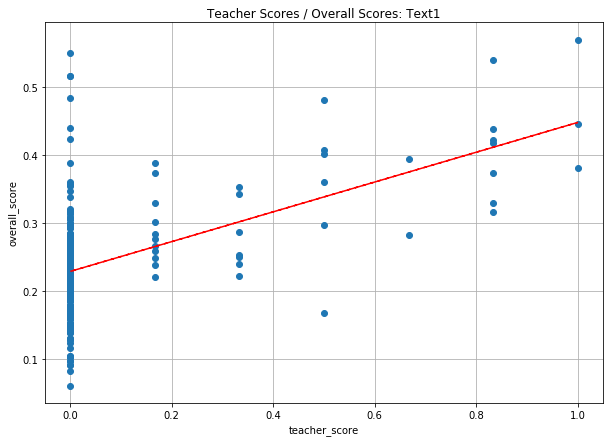

None


Analysis of Overall Scores: Text2 overall_score against teacher scores:
Mean squared error rate is 0.07
Pearson correlation co-efficient:  0.38 and two-tailed pvalue: 0.0


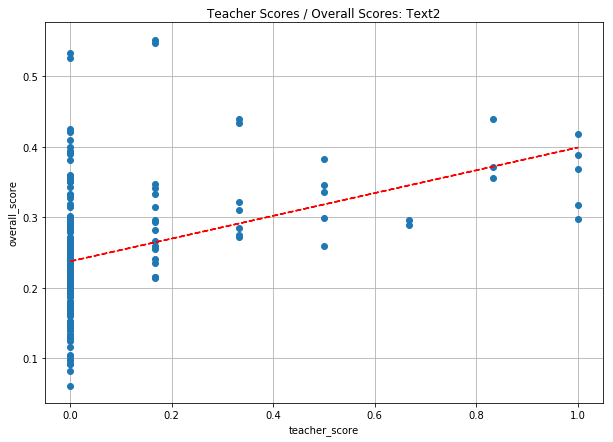

None


Analysis of Overall Scores: Text3 overall_score against teacher scores:
Mean squared error rate is 0.07
Pearson correlation co-efficient:  0.31 and two-tailed pvalue: 0.0


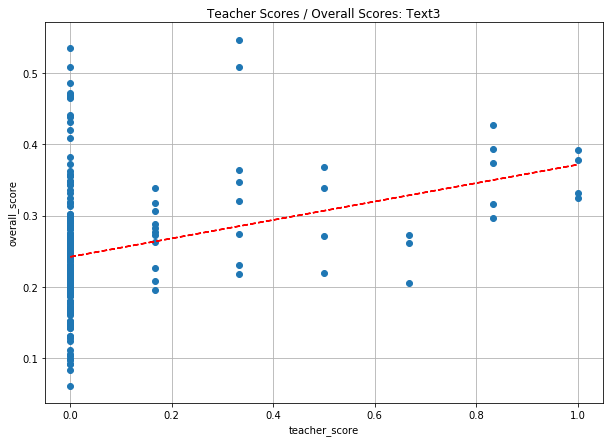

None




In [15]:
Analysis_Helper.drop_dups_get_errorrate(texts1to3_allfeatures.loc[texts1to3_allfeatures['text']==1], 'overall_score', 'Overall Scores: Text1', graph='yes')
Analysis_Helper.drop_dups_get_errorrate(texts1to3_allfeatures.loc[texts1to3_allfeatures['text']==2], 'overall_score', 'Overall Scores: Text2', graph='yes')
Analysis_Helper.drop_dups_get_errorrate(texts1to3_allfeatures.loc[texts1to3_allfeatures['text']==3], 'overall_score', 'Overall Scores: Text3', graph='yes')

Analysis of Overall Scores: Texts 1 to 3 overall_score against teacher scores:
Mean squared error rate is 0.07
Pearson correlation co-efficient:  0.4 and two-tailed pvalue: 0.0


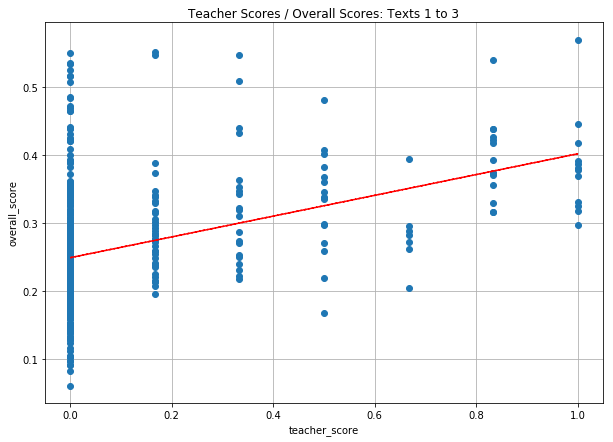

None




In [16]:
Analysis_Helper.drop_dups_get_errorrate(texts1to3_allfeatures, 'overall_score', 'Overall Scores: Texts 1 to 3', graph='yes')